# Titanic survived Project

# Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

# Attribute Information

Passenger id- Unique Id of the passenger

Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Survived- Survived (0 = No; 1 = Yes)

Name- Name of the passenger

Sex- Sex of the passenger (Male, Female)

Age- Age of the passenger

Sibsp- Number of Siblings/Spouses Aboard

Parch- Number of Parents/Children Aboard

Ticket- Ticket Number

Fare- Passenger Fare (British pound)
cabin - Cabin
n
Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampto)


# Dataset Link

https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Titanic/titanic_train.csv

In [69]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,precision_score,r2_score,roc_curve,roc_auc_score
from scipy.stats import zscore,boxcox

In [71]:
titanic=pd.read_csv(r'C:\Users\KIRUTHIKA\OneDrive\Documents\PG Program in Data Science Machine Learning and Neural Network\Internship\Datasets\phase2\titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
titanic.shape

(891, 12)

In [79]:
titanic.duplicated().sum()

0

In [81]:
#remove null using SimpleImputer for int type column
imputer=SimpleImputer()
titanic['Age']=imputer.fit_transform(titanic[['Age']])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
#remove null using SimpleImputer for object type column
impute=SimpleImputer(strategy='most_frequent')
titanic[['Cabin','Embarked']]=impute.fit_transform(titanic[['Cabin','Embarked']])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [85]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [87]:
#drop the Name column
titanic.drop(columns='Name',axis=1,inplace=True)

In [89]:
titanic.shape

(891, 11)

In [91]:
cabin_new=titanic['Cabin'].astype('str')
new_cabin=np.array([i[0] for i in cabin_new])
cabins=pd.Categorical(new_cabin)

In [93]:
#reassigning the cabin column to new cabin
titanic['Cabin']=cabins

In [95]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,B,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,B,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,male,35.0,0,0,373450,8.0500,B,S


In [97]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [99]:
#Apply LabelEncoder for Sex and Embarked column
le=LabelEncoder()
titanic['Sex']=le.fit_transform(titanic['Sex'])
titanic['Embarked']=le.fit_transform(titanic['Embarked'])
titanic['Cabin']=le.fit_transform(titanic['Cabin'])
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,1,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,1,2
3,4,1,1,0,35.0,1,0,113803,53.1000,2,2
4,5,0,3,1,35.0,0,0,373450,8.0500,1,2


In [101]:
titan=titanic.drop(columns=['Ticket'],axis=1)

In [103]:
titan.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1,2
1,2,1,1,0,38.0,1,0,71.2833,2,0
2,3,1,3,0,26.0,0,0,7.9250,1,2
3,4,1,1,0,35.0,1,0,53.1000,2,2
4,5,0,3,1,35.0,0,0,8.0500,1,2


In [105]:
titan.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.318743,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.916440,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,1.000000,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,7.000000,2.000000


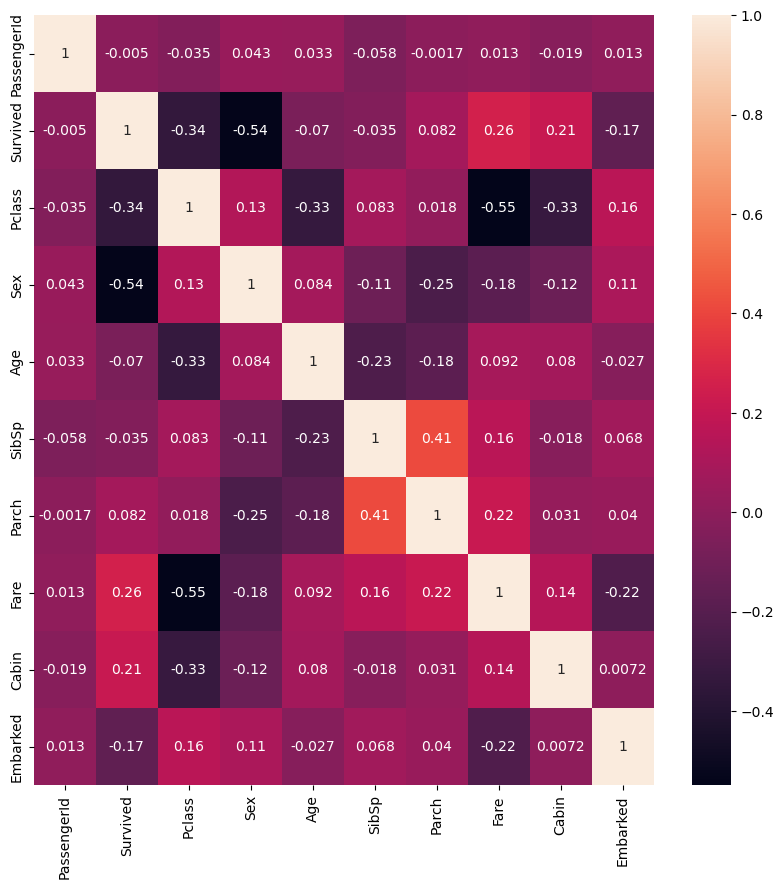

In [107]:
plt.figure(figsize=(10,10))
sns.heatmap(titan.corr(),annot=True)
plt.show()

In [109]:
#check the skewness in the dataset
titan.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Cabin          2.891654
Embarked      -1.264823
dtype: float64

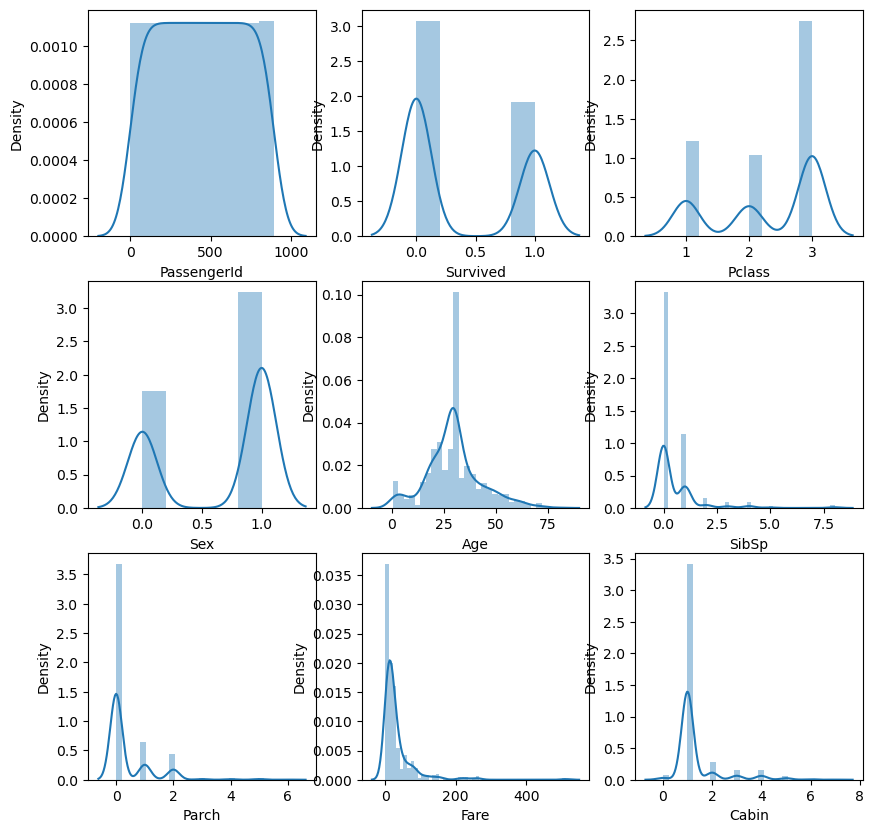

In [111]:
#check for the skewness in the dataset using sns.distplot
plt.figure(figsize=(10,10))
p=1
for i in titan:
    if p<=9:
        plt.subplot(3,3,p)
        sns.distplot(titan[i])
    p=p+1
plt.show()

In [113]:
#remove the skewness in the dataset using cbrt

titan['Fare']=np.cbrt(titan['Fare'])
titan['SibSp']=np.cbrt(titan['SibSp'])
titan['Parch']=np.cbrt(titan['Parch'])
titan['Cabin']=np.cbrt(titan['Cabin'])

In [115]:
titan.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          1.033059
Parch          1.348334
Fare           1.230382
Cabin         -0.424571
Embarked      -1.264823
dtype: float64

In [117]:
#remove the skewness in the dataset using boxcox log transformation method

titan['Fare']=boxcox(titan['Fare'],0.5)
titan['SibSp']=boxcox(titan['SibSp'],0.5)
titan['Parch']=boxcox(titan['Parch'],0.5)

In [119]:
titan.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          0.835305
Parch          1.253311
Fare          -0.957025
Cabin         -0.424571
Embarked      -1.264823
dtype: float64

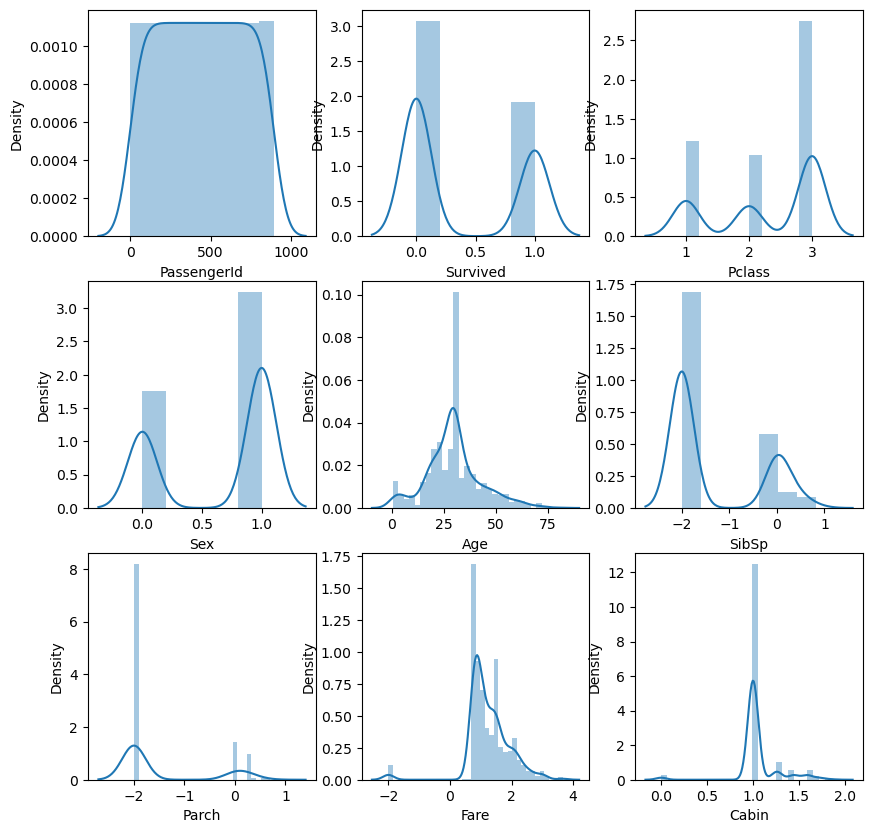

In [121]:
#check for the skewness in the dataset using sns.distplot after removing skewness
plt.figure(figsize=(10,10))
p=1
for i in titan:
    if p<=9:
        plt.subplot(3,3,p)
        sns.distplot(titan[i])
    p=p+1
plt.show()

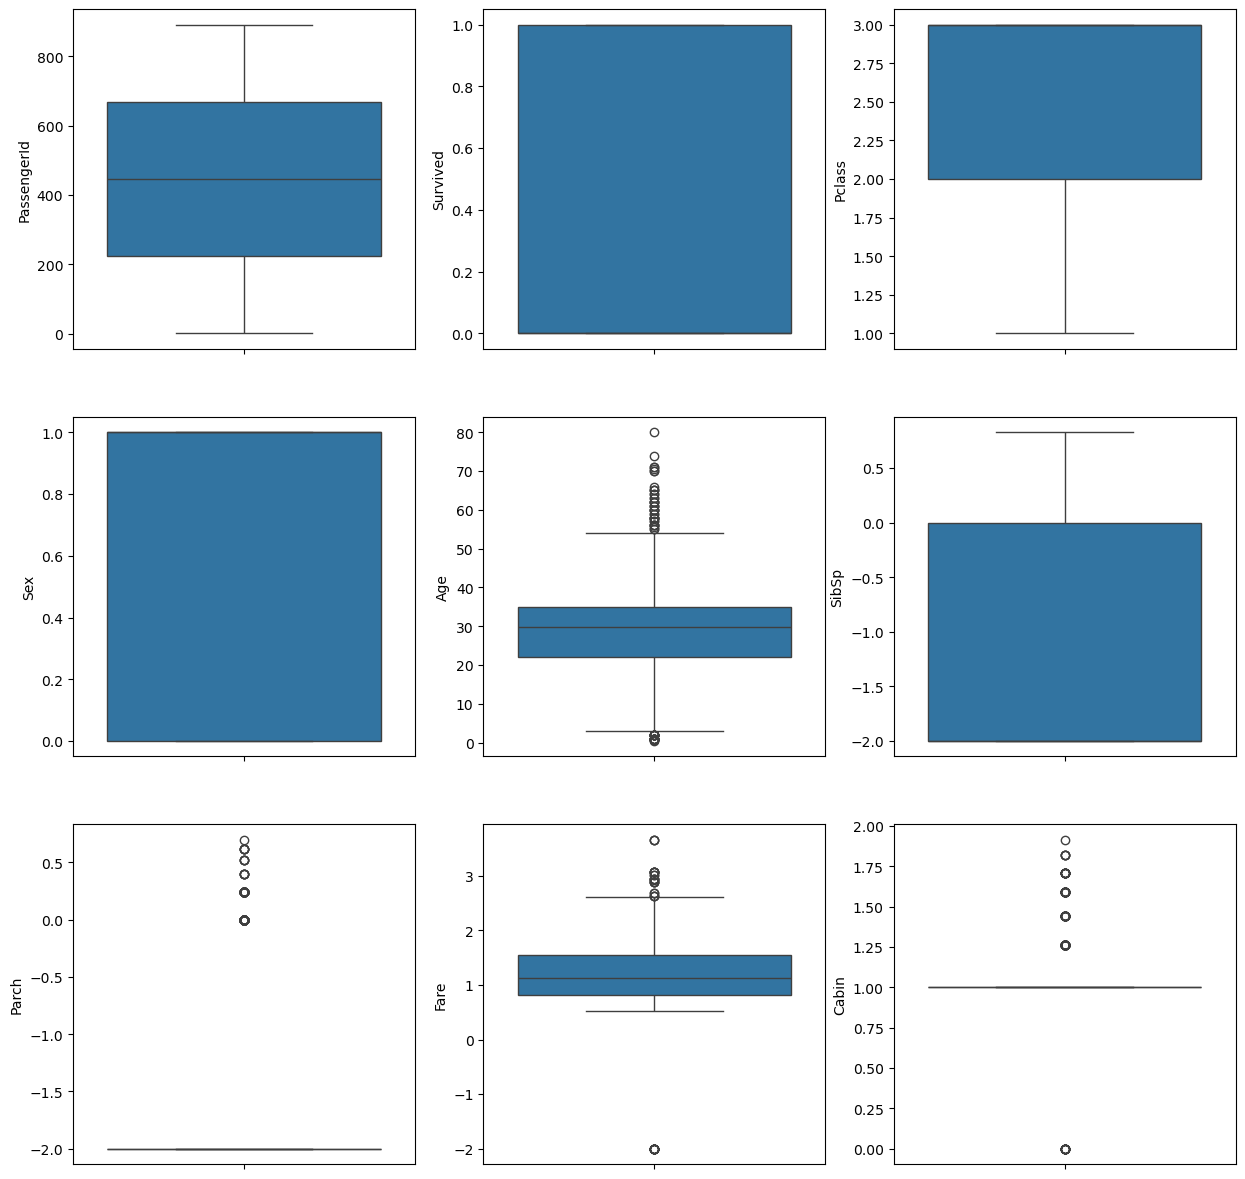

In [123]:
#check for the outliers in the dataset
plt.figure(figsize=(15,15))
p=1
for i in titan:
    if p<=9:
        plt.subplot(3,3,p)
        sns.boxplot(titan[i])
    p=p+1
plt.show()

In [125]:
#remove the outliers in the dataset using zscore

z=np.abs(zscore(titan))
z

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1.730108,0.789272,0.827377,0.737695,0.592481,1.342864,0.558403,0.676240,0.237947,0.585954
1,1.726220,1.266990,1.566107,1.355574,0.638789,1.342864,0.558403,1.178964,0.931102,1.942303
2,1.722332,1.266990,0.827377,1.355574,0.284663,0.677419,0.558403,0.616433,0.237947,0.585954
3,1.718444,1.266990,1.566107,1.355574,0.407926,1.342864,0.558403,0.898468,0.931102,0.585954
4,1.714556,0.789272,0.827377,0.737695,0.407926,0.677419,0.558403,0.605827,0.237947,0.585954
...,...,...,...,...,...,...,...,...,...,...
886,1.714556,0.789272,0.369365,0.737695,0.207709,0.677419,0.558403,0.267247,0.237947,0.585954
887,1.718444,1.266990,1.566107,1.355574,0.823344,0.677419,0.558403,0.392314,0.237947,0.585954
888,1.722332,0.789272,0.827377,1.355574,0.000000,1.342864,1.904756,0.188394,0.237947,0.585954
889,1.726220,1.266990,1.566107,0.737695,0.284663,0.677419,0.558403,0.392314,0.931102,1.942303


In [127]:
np.where(z>3)

(array([ 10,  23,  96,  96, 116, 174, 179, 185, 205, 209, 251, 258, 263,
        271, 277, 284, 302, 339, 394, 413, 445, 466, 475, 481, 493, 556,
        583, 597, 599, 630, 630, 633, 647, 672, 674, 679, 732, 737, 745,
        806, 806, 815, 822, 851, 867], dtype=int64),
 array([8, 8, 4, 8, 4, 8, 7, 8, 8, 8, 8, 7, 7, 7, 7, 8, 7, 8, 8, 7, 8, 7,
        8, 7, 4, 8, 8, 7, 8, 4, 8, 7, 8, 4, 7, 7, 7, 7, 4, 7, 8, 7, 7, 4,
        8], dtype=int64))

In [129]:
titans=titan[(z<3).all(axis=1)]
titans.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,0.0,-2.0,0.782401,1.000000,2
1,2,1,1,0,38.0,0.0,-2.0,2.072502,1.259921,0
2,3,1,3,0,26.0,-2.0,-2.0,0.823990,1.000000,2
3,4,1,1,0,35.0,0.0,-2.0,1.877446,1.259921,2
4,5,0,3,1,35.0,-2.0,-2.0,0.831366,1.000000,2


In [131]:
#Get percentage of data loss
print("Percentage of data loss",((titan.shape[0]-titans.shape[0])/titan.shape[0])*100)

Percentage of data loss 4.713804713804714


In [133]:
titan.shape

(891, 10)

In [135]:
titans.shape

(849, 10)

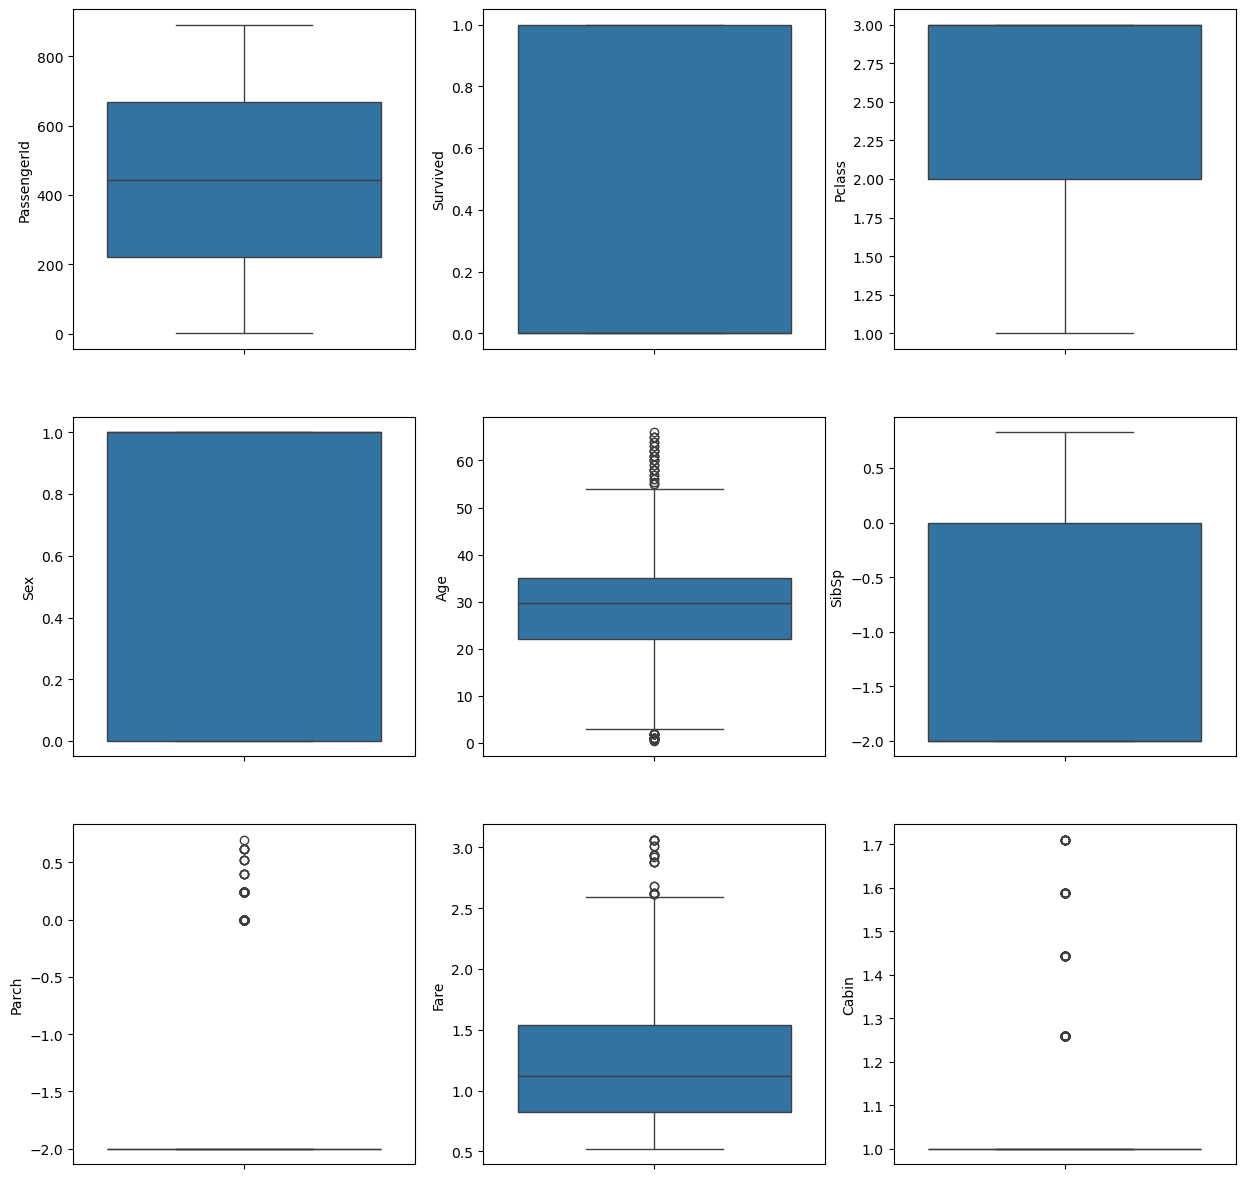

In [137]:
#check the dataset after removing outliers
plt.figure(figsize=(15,15))
p=1
for i in titans:
    if p<=9:
        plt.subplot(3,3,p)
        sns.boxplot(titans[i])
    p=p+1
plt.show()

<Axes: xlabel='Pclass', ylabel='SibSp'>

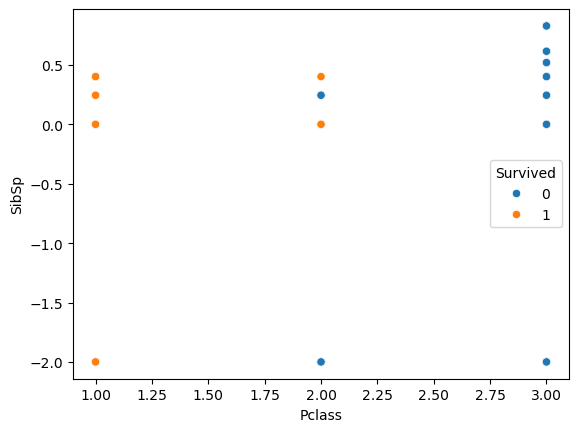

In [139]:
sns.scatterplot(data=titan,x='Pclass',y='SibSp',hue='Survived')

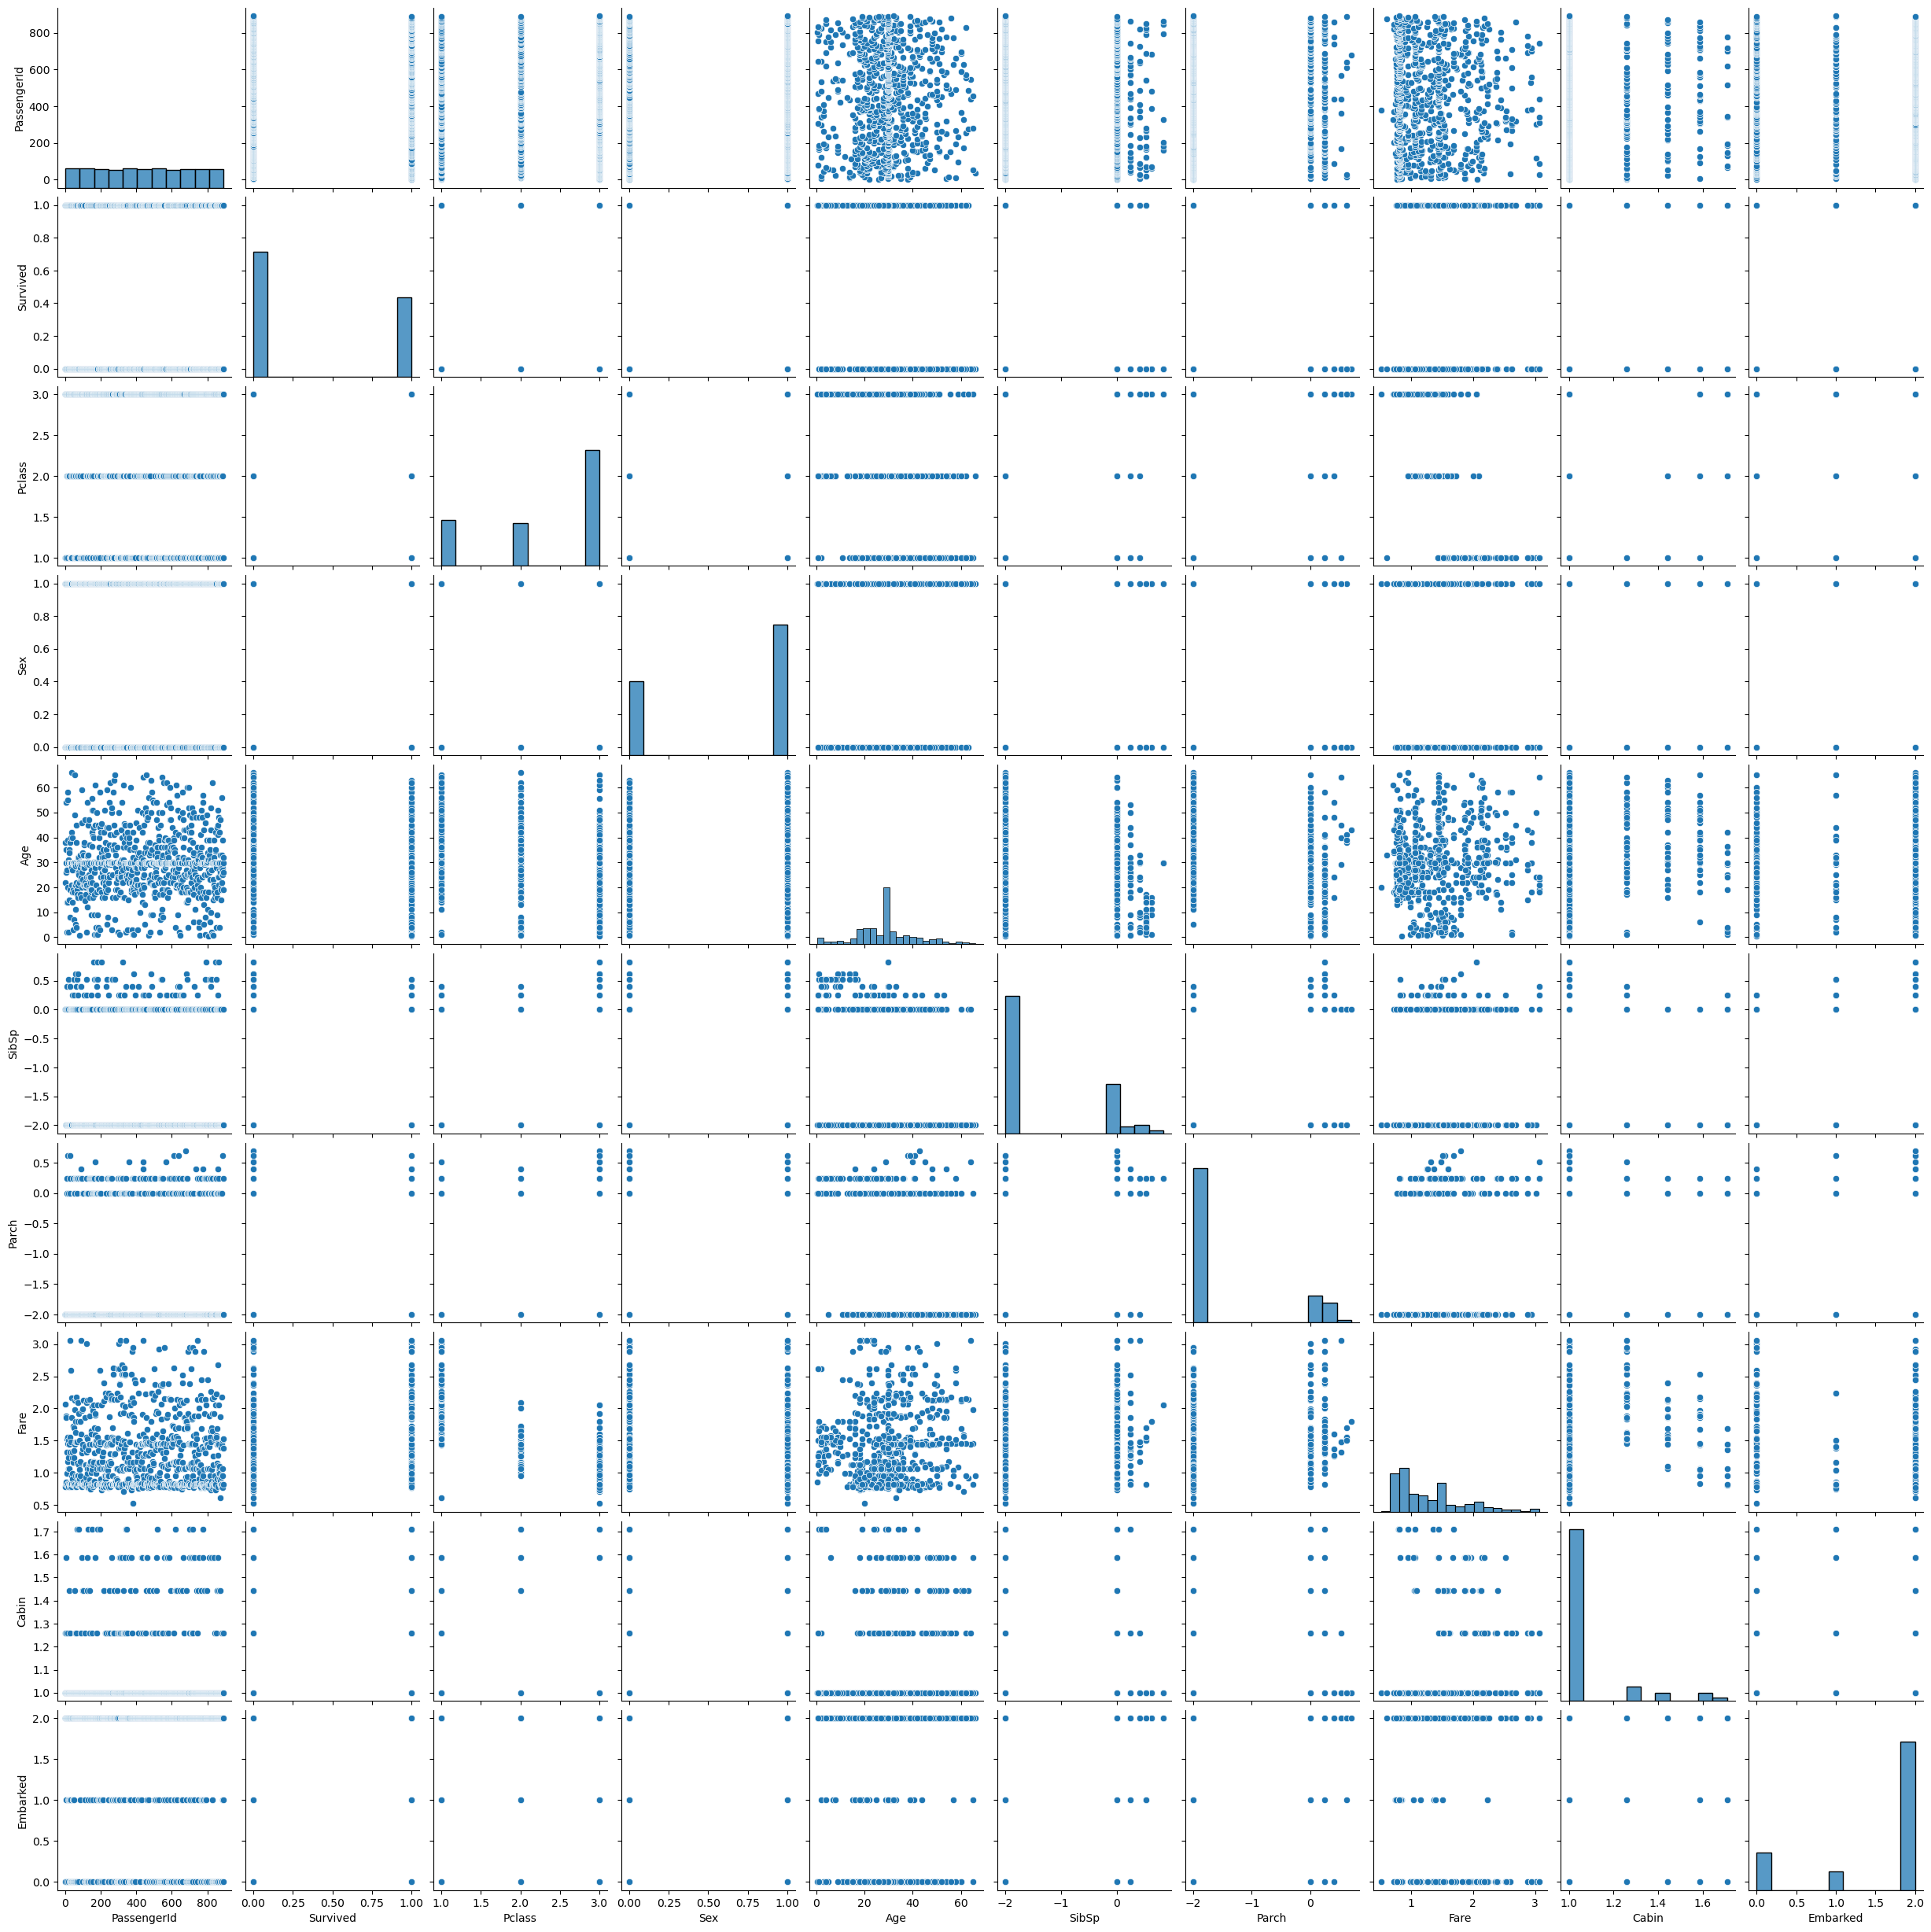

In [141]:
sns.pairplot(titans)

In [143]:
x=titans.drop(columns='Survived',axis=1)
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,1,22.0,0.0,-2.0,0.782401,1.000000,2
1,2,1,0,38.0,0.0,-2.0,2.072502,1.259921,0
2,3,3,0,26.0,-2.0,-2.0,0.823990,1.000000,2
3,4,1,0,35.0,0.0,-2.0,1.877446,1.259921,2
4,5,3,1,35.0,-2.0,-2.0,0.831366,1.000000,2


In [145]:
y=titans['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [147]:
#check for multicollinearity in the dataset
def calc_vif(x):
    vif=pd.DataFrame()
    vif['columns']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [149]:
calc_vif(x)

,columns,VIF
0,PassengerId,3.950995
1,Pclass,8.436727
2,Sex,3.068716
3,Age,7.694500
4,SibSp,3.734759
5,Parch,5.080803
6,Fare,12.002111
7,Cabin,32.691062
8,Embarked,4.957781


In [151]:
x.drop(columns='Cabin',axis=1,inplace=True)

In [153]:
calc_vif(x)

,columns,VIF
0,PassengerId,3.916342
1,Pclass,6.220734
2,Sex,3.064129
3,Age,7.394038
4,SibSp,3.574929
5,Parch,4.865729
6,Fare,5.060323
7,Embarked,4.824394


In [155]:
y.value_counts()

Survived
0    520
1    329
Name: count, dtype: int64

In [157]:
#apply SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE

In [159]:
smt=SMOTE()
xtrain,ytrain=smt.fit_resample(x,y)

In [161]:
ytrain.value_counts()

Survived
0    520
1    520
Name: count, dtype: int64

In [163]:
xtrain.shape

(1040, 8)

In [165]:
ytrain.shape

(1040,)

In [167]:
#apply standardScaler
sc=StandardScaler()
xtrained=sc.fit_transform(xtrain)
x_scaled=pd.DataFrame(xtrained,columns=xtrain.columns)
x_scaled.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-1.737741,0.937050,0.936620,-0.574676,1.338705,-0.585225,-1.024147,0.670846
1,-1.733826,-1.431192,-1.067669,0.731349,1.338705,-0.585225,1.376410,-1.798817
2,-1.729911,0.937050,-1.067669,-0.248170,-0.732569,-0.585225,-0.946759,0.670846
3,-1.725996,-1.431192,-1.067669,0.486469,1.338705,-0.585225,1.013460,0.670846
4,-1.722080,0.937050,0.936620,0.486469,-0.732569,-0.585225,-0.933035,0.670846


In [169]:
lg=LogisticRegression()
nvb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()

In [171]:
model=[lg,nvb,svc,dtc,knn,rfc]

for i in model:
    cvs=cross_val_score(i,x_scaled,ytrain,cv=5,n_jobs=-1)
    print("Cross Validation Score for",i,"is",cvs,"and mean of the cross validation is",np.mean(cvs))

Cross Validation Score for LogisticRegression() is [0.75480769 0.81730769 0.74519231 0.88461538 0.82211538] and mean of the cross validation is 0.8048076923076923
Cross Validation Score for GaussianNB() is [0.70673077 0.78846154 0.72596154 0.86057692 0.84134615] and mean of the cross validation is 0.7846153846153846
Cross Validation Score for SVC() is [0.79326923 0.80769231 0.75       0.91346154 0.87980769] and mean of the cross validation is 0.8288461538461538
Cross Validation Score for DecisionTreeClassifier() is [0.66346154 0.52403846 0.32211538 0.53365385 0.50961538] and mean of the cross validation is 0.510576923076923
Cross Validation Score for KNeighborsClassifier() is [0.76923077 0.80769231 0.69230769 0.875      0.8125    ] and mean of the cross validation is 0.7913461538461538
Cross Validation Score for RandomForestClassifier() is [0.77403846 0.64423077 0.43269231 0.83653846 0.50480769] and mean of the cross validation is 0.6384615384615385


In [177]:
maxacc=0
maxrs=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    y_pred_train=lg.predict(x_train)
    acc=accuracy_score(y_test,y_pred)
    prec=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    if acc> maxacc:
        maxacc=acc
        maxrs=i
print("Maximum accuracy is",maxacc,"Precision score",prec,"recall score",recall,"and maximum random state is",maxrs)

Maximum accuracy is 0.8313725490196079 Precision score 0.6631578947368421 recall score 0.65625 and maximum random state is 97


In [179]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,ytrain,test_size=0.30,random_state=97)

In [181]:
x_train.shape

(728, 8)

In [183]:
x_test.shape

(312, 8)

In [185]:
y_train.shape

(728,)

In [187]:
y_test.shape

(312,)

In [189]:
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print(y_pred)

[0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1
 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1
 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1
 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1
 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0
 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0
 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0]


In [191]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.8525641025641025


In [193]:
print("Confusion Matrix",confusion_matrix(y_test,y_pred))

Confusion Matrix [[135  25]
 [ 21 131]]


In [195]:
#AUC-ROC curve

y_pred=lg.predict_proba(x_test)[:,1]

In [197]:
y_pred

array([0.15555684, 0.95575947, 0.97132371, 0.25708659, 0.98152366,
       0.64106362, 0.9582228 , 0.10161242, 0.97303845, 0.92275689,
       0.83054708, 0.15094469, 0.39404261, 0.54649009, 0.13824256,
       0.10304572, 0.11170158, 0.31572089, 0.93904697, 0.93170094,
       0.105343  , 0.48105036, 0.67047169, 0.06740057, 0.96821151,
       0.93837978, 0.7009429 , 0.95338627, 0.14658502, 0.05881235,
       0.13635372, 0.97924527, 0.84817209, 0.88759977, 0.13298968,
       0.60022014, 0.89719653, 0.88087642, 0.66775839, 0.04867688,
       0.3516454 , 0.09751675, 0.14682559, 0.95245109, 0.10368681,
       0.15012223, 0.86527785, 0.11814084, 0.15846552, 0.23493949,
       0.97870555, 0.94184627, 0.15504717, 0.95779103, 0.74200923,
       0.11909039, 0.33036435, 0.72284072, 0.75178633, 0.32058544,
       0.97335269, 0.437621  , 0.21512674, 0.35759854, 0.15572974,
       0.46049633, 0.80694959, 0.57882025, 0.97235854, 0.88898626,
       0.14422244, 0.13361848, 0.85002776, 0.69283102, 0.43341

In [199]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [201]:
fpr

array([0.     , 0.     , 0.     , 0.00625, 0.00625, 0.01875, 0.01875,
       0.03125, 0.03125, 0.04375, 0.04375, 0.05   , 0.05   , 0.06875,
       0.06875, 0.075  , 0.075  , 0.08125, 0.08125, 0.09375, 0.09375,
       0.1    , 0.1    , 0.10625, 0.10625, 0.1125 , 0.1125 , 0.11875,
       0.11875, 0.13125, 0.13125, 0.1375 , 0.1375 , 0.15625, 0.15625,
       0.18125, 0.18125, 0.2    , 0.2    , 0.225  , 0.225  , 0.25625,
       0.25625, 0.28125, 0.28125, 0.34375, 0.34375, 0.36875, 0.36875,
       0.43125, 0.43125, 0.4375 , 0.4375 , 0.45625, 0.45625, 0.53125,
       0.53125, 0.5625 , 0.5625 , 0.70625, 0.70625, 0.80625, 0.80625,
       0.94375, 0.94375, 1.     ])

In [203]:
tpr

array([0.        , 0.00657895, 0.64473684, 0.64473684, 0.66447368,
       0.66447368, 0.68421053, 0.68421053, 0.70394737, 0.70394737,
       0.73026316, 0.73026316, 0.75      , 0.75      , 0.75657895,
       0.75657895, 0.76973684, 0.76973684, 0.78947368, 0.78947368,
       0.79605263, 0.79605263, 0.80921053, 0.80921053, 0.82236842,
       0.82236842, 0.83552632, 0.83552632, 0.84210526, 0.84210526,
       0.84868421, 0.84868421, 0.86184211, 0.86184211, 0.88815789,
       0.88815789, 0.89473684, 0.89473684, 0.90789474, 0.90789474,
       0.91447368, 0.91447368, 0.92105263, 0.92105263, 0.92763158,
       0.92763158, 0.93421053, 0.93421053, 0.94078947, 0.94078947,
       0.94736842, 0.94736842, 0.95394737, 0.95394737, 0.96052632,
       0.96052632, 0.96710526, 0.96710526, 0.97368421, 0.97368421,
       0.98684211, 0.98684211, 0.99342105, 0.99342105, 1.        ,
       1.        ])

In [205]:
threshold

array([       inf, 0.98152366, 0.76909638, 0.76245121, 0.75178633,
       0.74864329, 0.7334444 , 0.729731  , 0.72076971, 0.7167186 ,
       0.70296416, 0.7009429 , 0.69283102, 0.68520096, 0.6844543 ,
       0.6808105 , 0.67884755, 0.67805859, 0.66775839, 0.65793648,
       0.64403486, 0.64106362, 0.63156694, 0.62986056, 0.61881447,
       0.60943408, 0.60718079, 0.60022014, 0.59927097, 0.56850156,
       0.54848939, 0.54672976, 0.5381138 , 0.50492176, 0.47274873,
       0.44346765, 0.437621  , 0.39592733, 0.3935378 , 0.35648717,
       0.3516454 , 0.33700627, 0.33482071, 0.32058544, 0.31572089,
       0.22237417, 0.21551372, 0.20187237, 0.19033163, 0.15587583,
       0.15572974, 0.15555684, 0.15504717, 0.15153504, 0.15127243,
       0.13945996, 0.13929718, 0.13298968, 0.12956043, 0.10715503,
       0.10470841, 0.09624909, 0.09276701, 0.05740213, 0.05594634,
       0.03770426])

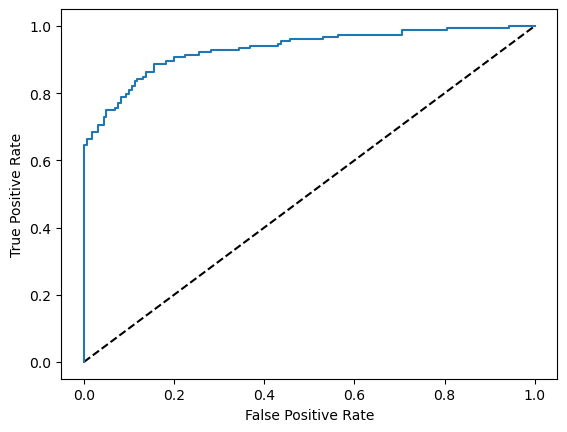

In [207]:
#plot roccurve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [209]:
parm_grid={"penalty":['l1', 'l2', 'elasticnet', None],"dual":[True,False],"solver":['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],"multi_class":['auto','ovr','multinomial'],"warm_start":[True,False]}

In [211]:
parm_grid

{'penalty': ['l1', 'l2', 'elasticnet', None],
 'dual': [True, False],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga'],
 'multi_class': ['auto', 'ovr', 'multinomial'],
 'warm_start': [True, False]}

In [213]:
gscv=GridSearchCV(lg,param_grid=parm_grid,cv=5,scoring='accuracy',n_jobs=-1)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'dual': [True, False],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'warm_start': [True, False]},
             scoring='accuracy')

In [214]:
gscv.best_params_

{'dual': False,
 'multi_class': 'auto',
 'penalty': None,
 'solver': 'lbfgs',
 'warm_start': True}

In [217]:
lgr=LogisticRegression(penalty=None,solver='lbfgs',dual=False,multi_class='auto',warm_start=True)
lgr.fit(x_train,y_train)
y_predlgr=lgr.predict(x_test)
y_predlgr

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [219]:
print("Accuracy Score",accuracy_score(y_test,y_predlgr))
print("Precision Score", precision_score(y_test,y_predlgr))
print("Recall Score",recall_score(y_test,y_predlgr))
print("Confusion Matrix",confusion_matrix(y_test,y_predlgr))

Accuracy Score 0.8557692307692307
Precision Score 0.8451612903225807
Recall Score 0.8618421052631579
Confusion Matrix [[136  24]
 [ 21 131]]


In [221]:
#AUC-ROC curve

y_predlgr=lgr.predict_proba(x_test)[:,1]

In [223]:
fpr,tpr,threshold=roc_curve(y_test,y_predlgr)

In [225]:
fpr

array([0.     , 0.     , 0.     , 0.00625, 0.00625, 0.01875, 0.01875,
       0.0375 , 0.0375 , 0.04375, 0.04375, 0.05625, 0.05625, 0.08125,
       0.08125, 0.09375, 0.09375, 0.1    , 0.1    , 0.10625, 0.10625,
       0.1125 , 0.1125 , 0.11875, 0.11875, 0.13125, 0.13125, 0.15625,
       0.15625, 0.175  , 0.175  , 0.19375, 0.19375, 0.2    , 0.2    ,
       0.225  , 0.225  , 0.25625, 0.25625, 0.275  , 0.275  , 0.3625 ,
       0.3625 , 0.36875, 0.36875, 0.425  , 0.425  , 0.45625, 0.45625,
       0.55   , 0.55   , 0.5625 , 0.5625 , 0.7    , 0.7    , 0.70625,
       0.70625, 0.80625, 0.80625, 0.94375, 0.94375, 1.     ])

In [227]:
tpr

array([0.        , 0.00657895, 0.65131579, 0.65131579, 0.66447368,
       0.66447368, 0.68421053, 0.68421053, 0.71710526, 0.71710526,
       0.72368421, 0.72368421, 0.75657895, 0.75657895, 0.78947368,
       0.78947368, 0.79605263, 0.79605263, 0.80921053, 0.80921053,
       0.82236842, 0.82236842, 0.83552632, 0.83552632, 0.84210526,
       0.84210526, 0.86184211, 0.86184211, 0.88815789, 0.88815789,
       0.89473684, 0.89473684, 0.90131579, 0.90131579, 0.90789474,
       0.90789474, 0.91447368, 0.91447368, 0.92105263, 0.92105263,
       0.92763158, 0.92763158, 0.93421053, 0.93421053, 0.94078947,
       0.94078947, 0.95394737, 0.95394737, 0.96052632, 0.96052632,
       0.96710526, 0.96710526, 0.97368421, 0.97368421, 0.98026316,
       0.98026316, 0.98684211, 0.98684211, 0.99342105, 0.99342105,
       1.        , 1.        ])

In [229]:
threshold

array([       inf, 0.9829424 , 0.76711782, 0.76690672, 0.75555753,
       0.75051987, 0.73776125, 0.7267429 , 0.72004963, 0.71965117,
       0.71186336, 0.70914511, 0.69241496, 0.68481422, 0.67256004,
       0.65720789, 0.64726042, 0.64324176, 0.63163168, 0.63137554,
       0.62029182, 0.61787884, 0.60752077, 0.60639126, 0.59735233,
       0.55894743, 0.54278129, 0.49874234, 0.46666478, 0.44879691,
       0.44327006, 0.40601375, 0.39618456, 0.3914322 , 0.38640572,
       0.3553054 , 0.35506573, 0.33469793, 0.33362956, 0.32573021,
       0.31748574, 0.2125632 , 0.20615913, 0.19858875, 0.19135333,
       0.15202949, 0.1515774 , 0.14732543, 0.14710855, 0.13182575,
       0.13083676, 0.129293  , 0.12640454, 0.10462028, 0.10223218,
       0.10110431, 0.100948  , 0.0927822 , 0.08934799, 0.05413653,
       0.04865094, 0.03521691])

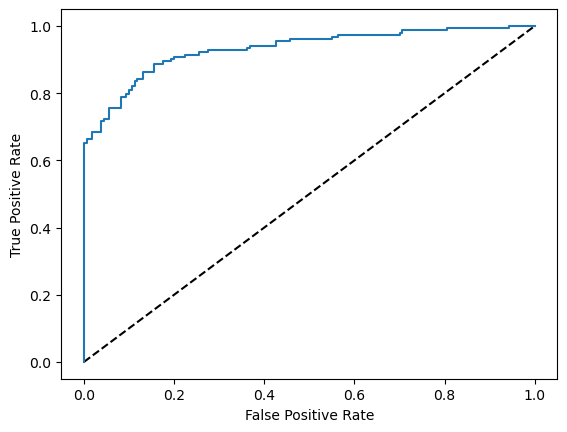

In [231]:
#plot roccurve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [233]:
#save the best model
import joblib as jl
file='titanicsurvived.pkl'
jl.dump(lgr,open(file,'wb'))

In [235]:
#Load the model
model=jl.load(open('titanicsurvived.pkl','rb'))

In [237]:
predict=model.predict(x_test)
predict

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [239]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted Output"]=predict
df["Actual Output"]=a
df

,Predicted Output,Actual Output
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
307,1,0
308,0,1
309,0,0
310,0,0
